In [41]:
#imports
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [29]:
boston = load_boston()

data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['MEDV'] = boston.target # add the target value column to the dataset

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Data Pre - Processing 

In [37]:
data.shape

(506, 14)

In [40]:
data.info() #Good All the columns are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


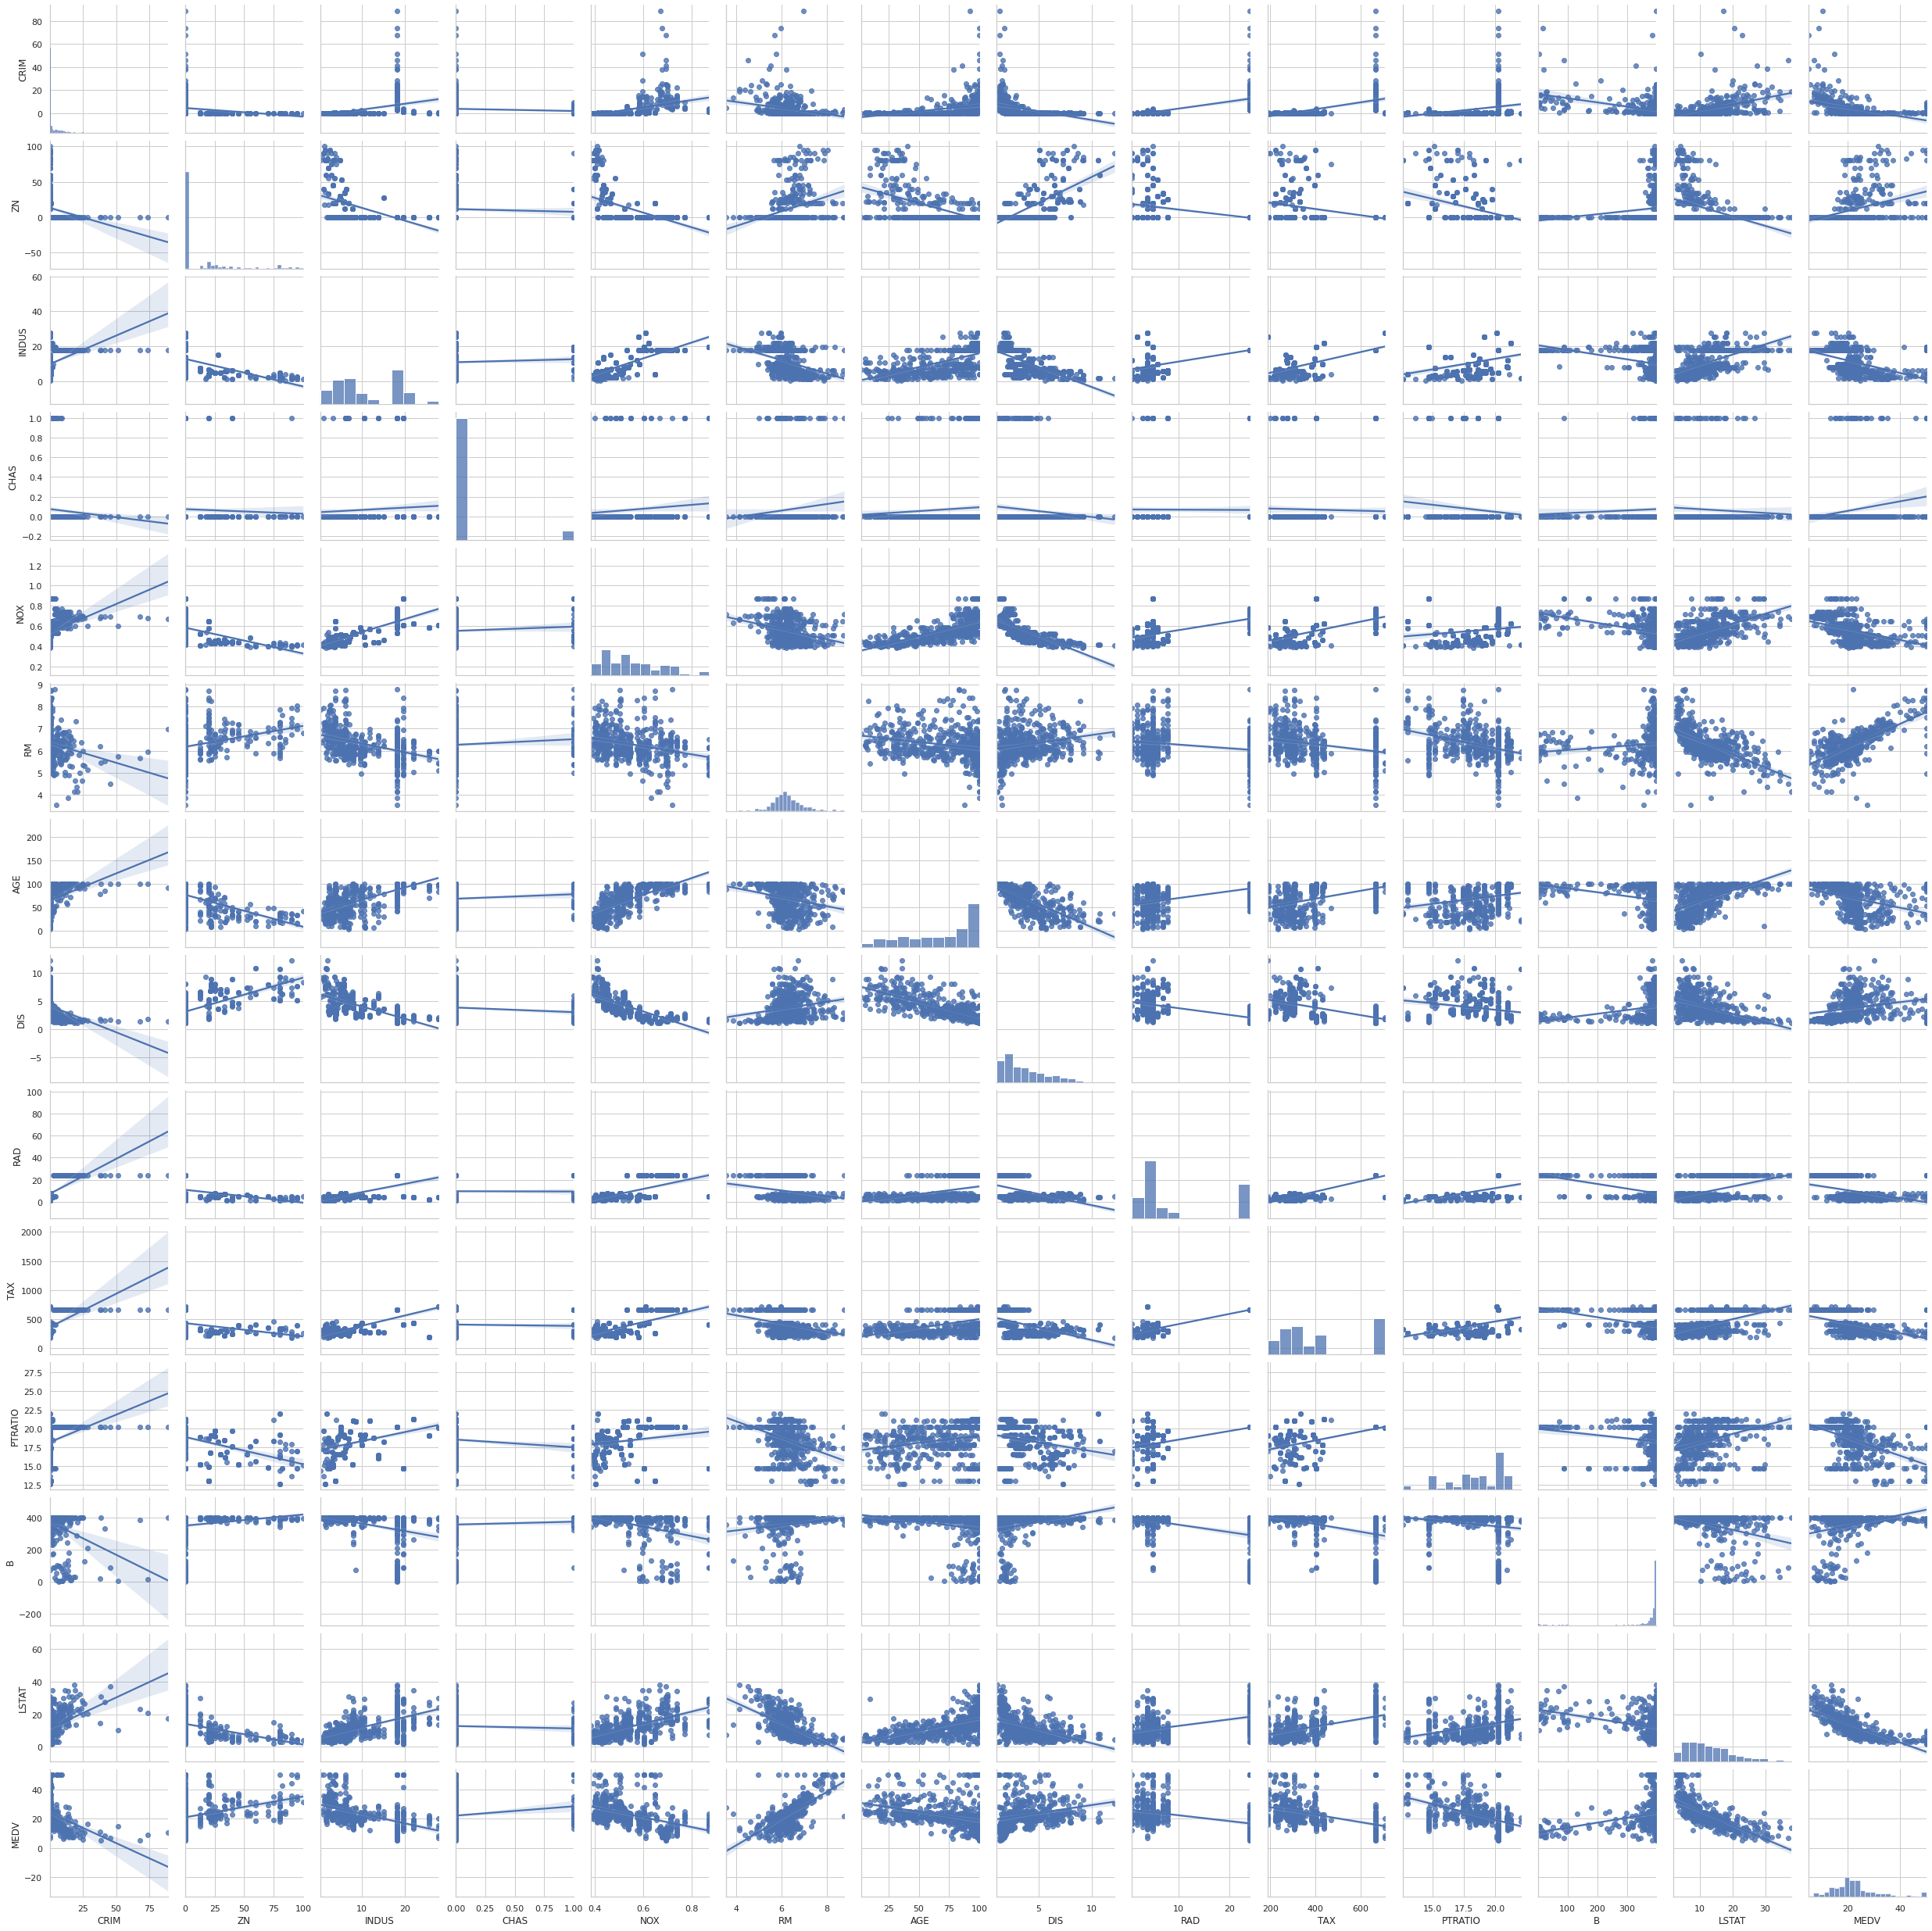

In [42]:
#Lets visualise the graph

sns.set_style('whitegrid')

sns.pairplot(data, kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


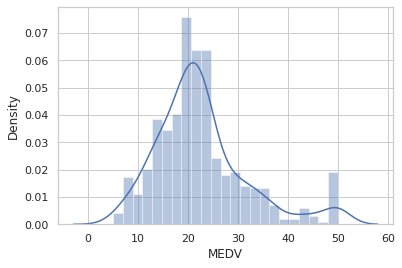

In [46]:
sns.distplot(data['MEDV']) 

#our target is normally distributed with few outliers 

In [44]:
y = data['MEDV']
X = data.drop(columns= ['MEDV'])
X.columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import  Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

pipeline = Pipeline([
                     ('scalar', StandardScaler()),
                      ('clf', LinearRegression())])

pipeline.fit(X_train, y_train)
print("test score is",pipeline.score(X_test, y_test))
print("train score is", pipeline.score(X_train, y_train))


test score is 0.7334492147453074
train score is 0.7383393920590519


Evaluation

In [115]:
# model evaluation for training set
y_train_predict = pipeline.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = pipeline.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236517
R2 score is 0.7383393920590519


The model performance for testing set
--------------------------------------
RMSE is 4.5682920423032085
R2 score is 0.7334492147453074


Text(0.5, 1.0, 'Comparision')

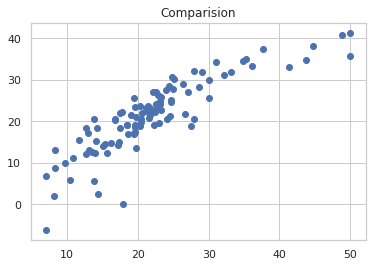

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(y_test,y_test_predict)
plt.title('Comparision')

In [117]:
import pickle

with open("boston_model.pickle", "wb") as f:
    pickle.dump(pipeline, f)

In [128]:

X_test.columns

X_test.head()
test = pd.DataFrame([[0.38214, 0.0, 6.20, 0.0, 0.504,
                            8.040	, 86.5, 3.2157, 8.0, 307.0, 17.4, 387.38, 3.13]],
                          columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                           'PTRATIO', 'B', 'LSTAT'], dtype=object)
print(pipeline.predict(test))

print(boston.DESCR)




[37.56311787]
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
       